# 第五章

## 5.1 用主成分分析实现无监督降维

### 5.1.1 主成分分析的主要步骤

#### 一般来说PCA降维的算法步骤
1.标准化d维数据集
2.构建协方差矩阵
3.将协方差矩阵分解为特征向量和特征值
4.通过降序对特征值进行排序，对相应的特征向量进行排序
5.选择对应k个最大特征值的k个特征向量，其中k为新空间的位数（k 小于等于 d）
6.从最上面的k特征向量开始构造投影矩阵W
7.用投影矩阵W变换d维输入数据集X获得新的k维特征子空间

#### 调用模块

In [94]:
import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

sys.path.append('C:\\Users\\Administrator\\Desktop\\myself')
# import plotClassifierRegions

plt.rcParams['font.sans-serif'] = ['SimHei'] # 输出中文
plt.rcParams['axes.unicode_minus'] = False # 正负轴显示

#### 分裂为独立的训练集和测试集，并标准化单位方差

In [39]:
dfWine = pd.read_csv(r"C:\Users\86138\Desktop\myself\刷过的书\python_机器学习\wine_data.csv")
X, y = dfWine.iloc[:, 1:].values, dfWine.iloc[:, 0].values
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=.3, stratify=y, random_state=0)
sc = StandardScaler()
xTrainStd = sc.fit_transform(xTrain)
xTestStd = sc.transform(xTest)

#### 获取协方差矩阵的特征向量和特征值

In [40]:
#covMatT = np.cov(xTrainStd)
covMat = np.cov(xTrainStd.T) # 转置保证特征值与行数相同，否则，为124个特征值，与特征数量不符合
eigenVals, eigenVecs = np.linalg.eig(covMat)
#eigenValsT, eigenVecsT = np.linalg.eig(covMat)
print("特征值: \n%s" % eigenVals)

特征值: 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


#### 特征值的方差解释比画出来，也就是某个特征值与特征值总和之比

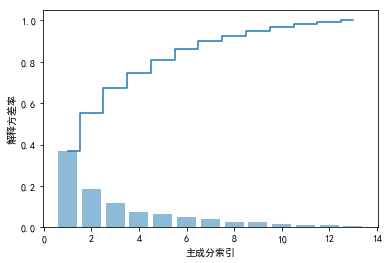

In [46]:
tot = sum(eigenVals)
varExp = [(i / tot) for i in sorted(eigenVals, reverse=True)]
cumVarExp = np.cumsum(varExp)
plt.bar(range(1,14), varExp, alpha=.5, align="center", label="独立的解释方差")
plt.step (range(1,14), cumVarExp, where="mid", label="累计的解释方差")
plt.ylabel("解释方差率")
plt.xlabel("主成分索引")
plt.show() # 前两个成分几乎占了60%

#### 特征转换
选择与前k个特征值对应的特征向量，其中k为新特征子空间的位置 k<=d
用前K个特征向量构造投影矩阵W
用投影矩阵W变换d为输入数据集X以获得新的k维特征子空间

In [50]:
eigenPairs = [(np.abs(eigenVals[i]), eigenVecs[:, i]) for i in range(len(eigenVals))]
eigenPairs.sort(key=lambda k:k[0], reverse=True)
w = np.hstack((eigenPairs[0][1][:, np.newaxis], eigenPairs[1][1][:, np.newaxis]))  # 水平合并[:,1]  [:,1]
print("Matrix W:\n", w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [51]:
xTrainStd[0].dot(w) # (1,13) dot (13,2) = (1,2)

array([2.38299011, 0.45458499])

In [52]:
xTrainStd[0]

array([ 0.71225893,  2.22048673, -0.13025864,  0.05962872, -0.50432733,
       -0.52831584, -1.24000033,  0.84118003, -1.05215112, -0.29218864,
       -0.20017028, -0.82164144, -0.62946362])

In [53]:
xTrainPca = xTrainStd.dot(w)

In [56]:
xTrainStd.shape

(124, 13)

In [58]:
xTrainPca.shape

(124, 2)

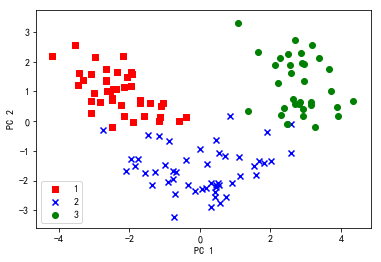

In [71]:
colors = list("rbg")
markers = list("sxo")
for l, c, m in zip(np.unique(yTrain), colors, markers):
    plt.scatter(xTrainPca[yTrain==l, 0], xTrainPca[yTrain==l, 1], c=c, label=l, marker=m)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc = "lower left")
plt.show()

#### sklearn的主成分分析

In [70]:
xTrainPca[yTrain==1, 1]

array([ 1.65376939,  1.02909066,  0.6024011 ,  0.94626934,  0.13877   ,
        0.16048055,  0.71745249,  1.47183304,  0.70412212,  2.18657552,
        0.51921086,  0.61392169,  0.76839561,  1.0848074 ,  1.01997476,
        0.00489815, -0.21308835,  1.1468486 ,  1.75933599,  1.35779609,
        1.66537927,  0.13747499,  2.16983165,  1.60141809,  0.6004608 ,
        1.39240115,  0.52868143, -0.04400723,  1.59724429,  1.21428442,
        1.6116814 ,  2.20145366,  0.00920072,  0.28287148,  0.69622621,
        0.63274325,  1.0745577 ,  0.16644199,  1.38137702,  2.57906029,
        1.18319185])

In [93]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    '''
    常用分类可视化函数
    param X 训练集
    param y 标签
    param classifier 已fit好的分类器
    test_idx 训练集的输入变量范围
    resolution 等高线 高度
    return 等高线 
    '''
    marker = list('sxo^v')
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=cmap(idx),
                    marker=marker[idx],
                    label=cl)


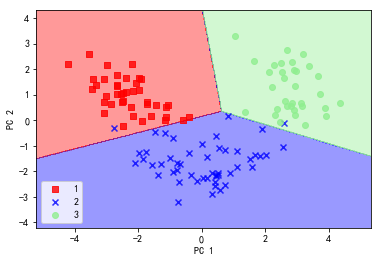

In [95]:
pca = PCA(n_components=2)
lr = LogisticRegression(solver="saga", multi_class="auto")
skTrainPca = pca.fit_transform(xTrainStd)
skTestPca = pca.transform(xTestStd)
lr.fit(skTrainPca, yTrain)
plot_decision_regions(skTrainPca, yTrain, classifier=lr)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc = "lower left")
plt.show()

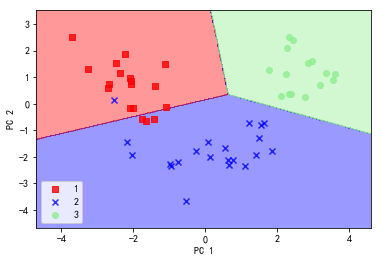

In [96]:
plot_decision_regions(skTestPca, yTest, classifier=lr)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc = "lower left")
plt.show()

In [98]:
pca=PCA(n_components=None) # 初始化PCA类，这样可以保持所有的主成分，然后通过解释方差属性比访问
xTrainPca = pca.fit_transform(xTrainStd)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [89]:
skTestPca.shape

(54, 2)